In [81]:
import torch
from sklearn.cluster import KMeans
import kmeans_embedding
from sklearn.decomposition import PCA
from utilities import create_directory
import os
import embedding_dataset
import importlib
importlib.reload(embedding_dataset)
importlib.reload(kmeans_embedding)
from embedding_dataset import EmbeddingFacesDataSet, get_all_samples
import shutil
from torch.utils.data import DataLoader

In [82]:
dataset, images_embeddings, labels =  get_all_samples()

In [83]:
fit_kmeans = kmeans_embedding.fit_on_data(images_embeddings)

/Users/shirabroner/DataScience/venv/Default/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [84]:
from sklearn.metrics import pairwise_distances_argmin_min
closest, _ = pairwise_distances_argmin_min(fit_kmeans.cluster_centers_, images_embeddings)

In [85]:
centers = [labels[im] for im in closest]
centers.sort()
create_directory('faces-labels')
[shutil.copyfile(c, c.replace('faces', 'faces-labels')) for c in centers]


['faces-labels/Wedding-1006_9.png',
 'faces-labels/Wedding-1038_3.png',
 'faces-labels/Wedding-1058_2.png',
 'faces-labels/Wedding-1063_7.png',
 'faces-labels/Wedding-1065_5.png',
 'faces-labels/Wedding-1065_6.png',
 'faces-labels/Wedding-1103_2.png',
 'faces-labels/Wedding-1105_5.png',
 'faces-labels/Wedding-1128_1.png',
 'faces-labels/Wedding-1130_0.png',
 'faces-labels/Wedding-1132_0.png',
 'faces-labels/Wedding-1139_4.png',
 'faces-labels/Wedding-1147_0.png',
 'faces-labels/Wedding-1147_4.png',
 'faces-labels/Wedding-1150_1.png',
 'faces-labels/Wedding-1153_7.png',
 'faces-labels/Wedding-1160_10.png',
 'faces-labels/Wedding-1176_1.png',
 'faces-labels/Wedding-1201_10.png',
 'faces-labels/Wedding-1335_0.png',
 'faces-labels/Wedding-1395_21.png',
 'faces-labels/Wedding-1415_4.png',
 'faces-labels/Wedding-1488_0.png',
 'faces-labels/Wedding-1553_2.png',
 'faces-labels/Wedding-1580_2.png',
 'faces-labels/Wedding-1588_7.png',
 'faces-labels/Wedding-1612_2.png',
 'faces-labels/Wedding-16

/Users/shirabroner/DataScience/venv/Default/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


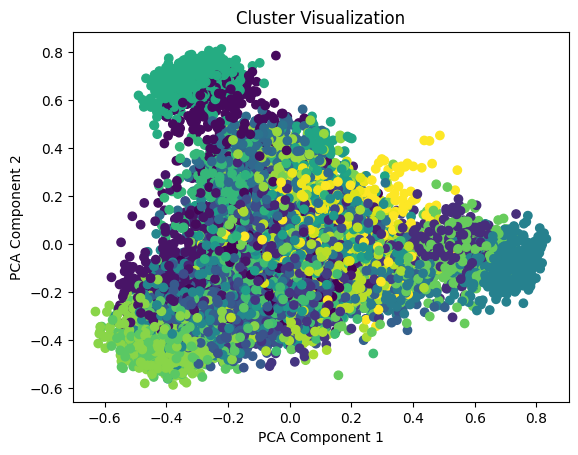

In [4]:
# Example tensor
tensor = dataset['x']

# Convert to NumPy array
numpy_array = tensor.numpy()

# Clustering
n_clusters = 40
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(numpy_array)

# Get Cluster Labels
cluster_labels = kmeans.labels_

# Optional: Visualization for 2D data
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(numpy_array)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels)
plt.title('Cluster Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [11]:
y = dataset['y']
labels = {label:[y[i] for i, l in enumerate(kmeans.labels_) if l == label] for label in set(kmeans.labels_)}

In [6]:
create_directory('faces-labels')

In [7]:
create_directory('faces-labels')
for k, v in labels.items():
    create_directory(os.path.join('faces-labels', str(k)), delete_if_exists=True)
    [shutil.copyfile(f, os.path.join('faces-labels', str(k), f.split('/')[1])) for f in v]

In [32]:
x = dataset['x']
centers_label_index = {}
for label, center in enumerate(kmeans.cluster_centers_):
    matches = torch.any(x == torch.tensor(kmeans.cluster_centers_[label]), dim=1)
    index = torch.where(matches)[0].item()
    centers_label_index[label] = index
    


RuntimeError: a Tensor with 0 elements cannot be converted to Scalar

In [31]:
label

1

Processing: 100%|██████████| 148/148 [17:41:27<00:00, 430.32s/it]   


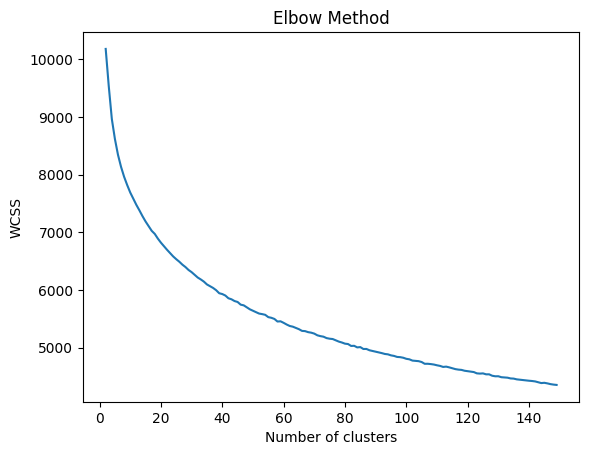

'\n\n'

In [87]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import tqdm

# Assuming numpy_array is your data converted from the tensor
range_n_clusters = range(2, 150)  # Example range (from 2 to 9)
numpy_array = images_embeddings.numpy()

# Elbow Method
wcss = []
for n_clusters in tqdm.tqdm(range_n_clusters, desc='Processing', total=len(range_n_clusters)) :
    kmeans = KMeans(n_clusters=n_clusters, n_init=10)
    kmeans.fit(numpy_array)
    wcss.append(kmeans.inertia_)

plt.plot(range_n_clusters, wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

"""

"""


In [4]:
# Silhouette Score
silhouette_avg = []
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10)
    cluster_labels = kmeans.fit_predict(numpy_array)
    silhouette_avg.append(silhouette_score(numpy_array, cluster_labels))

plt.plot(range_n_clusters, silhouette_avg)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Average Silhouette Score')
plt.show()

KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "/Users/shirabroner/DataScience/venv/Default/lib/python3.9/site-packages/numpy/core/multiarray.py", line 346, in where
    @array_function_from_c_func_and_dispatcher(_multiarray_umath.where)
KeyboardInterrupt: 
